In [2]:
import pandas as pd
import numpy as np

# Read the Excel file into DataFrames, skipping the first row
excel_file = r'E:\Phd\Project_PAH\Data\SIRTA_long term_2015_Max Planck_complete_vf02.xlsx'
sheet_name = 'PM_SOA_markers'
dataTable = pd.read_excel(excel_file, sheet_name=sheet_name, skiprows=[1])
database = pd.read_excel(excel_file, sheet_name='Database', skiprows=[1])

# Extract NO2 and NO3- concentrations
NO2_ng_m3 = database['NO2']
NO3_ng_m3 = database['NO3-']

# Molar mass of NO2 and NO3-
molar_mass_NO2 = 46.01  # g/mol
molar_mass_NO3 = 62.00  # g/mol

# Convert ng/m³ to g/m³
NO2_g_m3 = NO2_ng_m3 * 1e-9  # Convert from ng/m³ to g/m³
NO3_g_m3 = NO3_ng_m3 * 1e-9  # Convert from ng/m³ to g/m³

# Convert g/m³ to mol/m³
NO2_mol_m3 = NO2_g_m3 / molar_mass_NO2
NO3_mol_m3 = NO3_g_m3 / molar_mass_NO3

# Convert mol/m³ to mol/L
NO2_mol_L = NO2_mol_m3 / 1000  # Convert from mol/m³ to mol/L
NO3_mol_L = NO3_mol_m3 / 1000  # Convert from mol/m³ to mol/L

# Calculate NOR ratio
NOR = NO3_mol_L / (NO3_mol_L + NO2_mol_L)

# Add the NOR ratio to the database DataFrame
database['NOR'] = NOR

# Display the modified DataFrame
print(database[['NO2', 'NO3-', 'NOR']])


          NO2         NO3-       NOR
0    14.83090  2690.280354  0.992626
1    12.43250  1591.287352  0.989582
2    12.52640  6164.617797  0.997269
3    14.37790  2420.857869  0.992060
4    18.23840  2243.975338  0.989166
..        ...          ...       ...
122   5.36162  3968.838929  0.998183
123   6.59335  1831.132465  0.995171
124   4.32249  1358.572658  0.995731
125   7.08886  1345.271226  0.992949
126   5.58704  1841.401863  0.995928

[127 rows x 3 columns]


In [6]:
alwcdf='E:\Phd\Project_PAH\Data\ALWC_DATAFRAME.csv'
alwdf=pd.read_csv(alwcdf)
alwc=alwdf['ALWC']
rh=database['RH ']

0      17590.0
1       7957.0
2      55220.0
3      11880.0
4      27930.0
        ...   
122    10760.0
123     7436.0
124    28250.0
125    16410.0
126    24010.0
Name: ALWC, Length: 127, dtype: float64

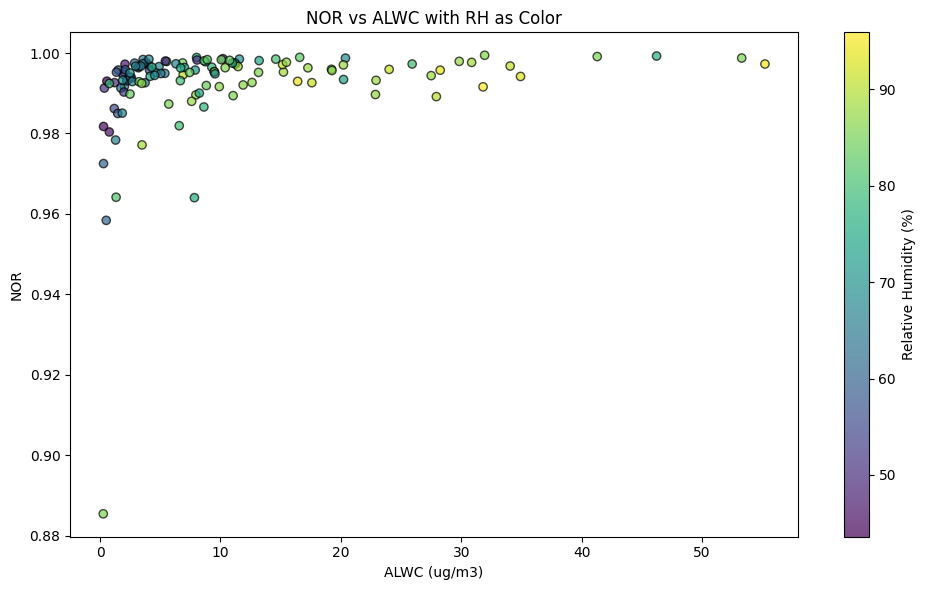

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the ALWC data from the CSV file
alwcdf = r'E:\Phd\Project_PAH\Data\ALWC_DATAFRAME.csv'
alwdf = pd.read_csv(alwcdf)
alwc = alwdf['ALWC']/1000

# Extract RH and NOR from the database DataFrame
rh = database['RH ']
nor = database['NOR']

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(alwc, nor, c=rh, cmap='viridis', edgecolor='k', alpha=0.7)

# Add color bar to indicate RH
cbar = plt.colorbar(scatter)
cbar.set_label('Relative Humidity (%)')

# Set labels and title
plt.xlabel('ALWC (ug/m3)')  # Replace 'units' with the appropriate units of ALWC
plt.ylabel('NOR')
plt.title('NOR vs ALWC with RH as Color')

# Show the plot
# plt.grid()
plt.tight_layout()
plt.show()
